In [3]:
!python -m pip install numpy
!python -m pip install scipy
!python -m pip install matplotlib
!python -m pip install openpyxl
!python -m pip install pandas
!python -m pip install pandas-datareader
!python -m pip install sktime
!python -m pip install shap
!python -m pip install --upgrade pip

In [4]:
import numpy as np
import pandas as pd 


from sklearn.preprocessing import LabelEncoder

import os


import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

print(os.listdir("C:/Users/Eduard/.vscode/extensions/ms-toolsai.jupyter-2021.6.832593372/pythonFiles/"))

['allpracs1.ipynb', 'allpracs2.ipynb', 'application_train.csv', 'delete_column.ipynb', 'econometric4.ipynb', 'econometric5.ipynb', 'econometric5_2.ipynb', 'HomeCredit_columns_description.csv', 'homework1.ipynb', 'Notebooks intro.ipynb', 'practicum 3.ipynb', 'Practicum_ML.ipynb', 'prog.ipynb', 'project_ML.ipynb', 'project_ML1.ipynb', 'project_ML2.ipynb', 'project_ML3.ipynb', 'student-mat-test.csv', 'student-mat-test1.csv', 'student-mat-test2.csv', 'student-mat.csv', 'table.xlsx', 'table1.csv', 'table1.xlsx']


In [6]:
app_train = pd.read_csv('C:/Users/Eduard/.vscode/extensions/ms-toolsai.jupyter-2021.6.832593372/pythonFiles/student-mat-test1.csv')
print('Training data shape: ', app_train.shape)
app_train.head()
#через head проверили сделали предобработку

Training data shape:  (395, 16)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [7]:
app_test = pd.read_csv('C:/Users/Eduard/.vscode/extensions/ms-toolsai.jupyter-2021.6.832593372/pythonFiles/student-mat-test2.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (395, 15)


,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [8]:
app_train['age'].value_counts()

age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64

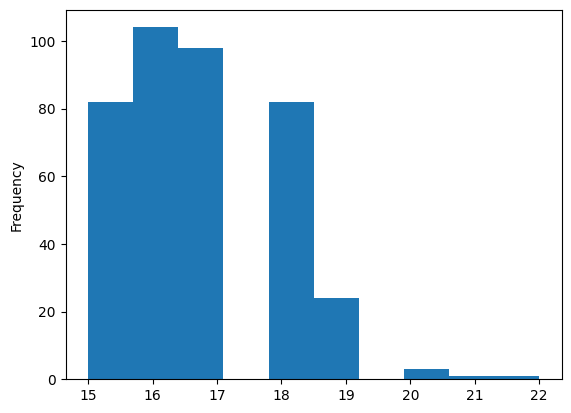

In [9]:
app_train['age'].astype(int).plot.hist();

In [10]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)
# нету NaN значений

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [12]:
# посмотрим типы данных
app_train.dtypes.value_counts()
#все int, без object

int64    16
Name: count, dtype: int64

In [13]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
#у нас их нет поэтому ничего

Series([], dtype: float64)

In [14]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

0 columns were label encoded.


In [15]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (395, 16)
Testing Features shape:  (395, 15)


In [16]:
train_labels = app_train['age']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['age'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (395, 16)
Testing Features shape:  (395, 15)


In [17]:
(app_train['freetime']).describe()

count    395.000000
mean       3.235443
std        0.998862
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

In [18]:
app_train['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

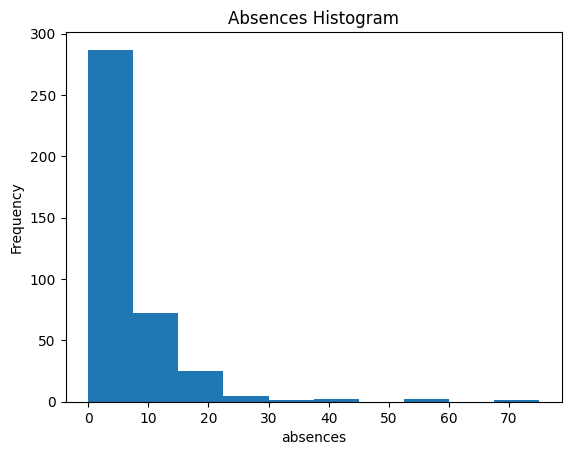

In [19]:
app_train['absences'].plot.hist(title = 'Absences Histogram');
plt.xlabel('absences');

In [20]:
anom = app_train[app_train['absences'] == 75]
non_anom = app_train[app_train['absences'] != 75]
print('The non-anomalies default on %0.2f%% of people' % (100 * non_anom['age'].mean()))
print('The anomalies default on %0.2f%% of people' % (100 * anom['age'].mean()))
print('There are %d anomalous absences' % len(anom))
print('это говорит о том что по факту аномалий по пропускам занятий нет')

The non-anomalies default on 1669.29% of people
The anomalies default on 1800.00% of people
There are 1 anomalous absences
это говорит о том что по факту аномалий по пропускам занятий нет


In [21]:
# Find correlations with the target and sort
correlations = app_train.corr()['age'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 Fedu         -0.163438
G3           -0.161579
G2           -0.143474
G1           -0.064081
health       -0.062187
studytime    -0.004140
freetime      0.016434
famrel        0.053940
traveltime    0.070641
Walc          0.117276
goout         0.126964
Dalc          0.131125
absences      0.175230
failures      0.243665
age           1.000000
Name: age, dtype: float64

Most Negative Correlations:
 Medu         -0.163658
Fedu         -0.163438
G3           -0.161579
G2           -0.143474
G1           -0.064081
health       -0.062187
studytime    -0.004140
freetime      0.016434
famrel        0.053940
traveltime    0.070641
Walc          0.117276
goout         0.126964
Dalc          0.131125
absences      0.175230
failures      0.243665
Name: age, dtype: float64


In [22]:
# Find the correlation of the guardian_other and age
app_train['failures'] = abs(app_train['failures'])
app_train['failures'].corr(app_train['age'])
#возраст больше всего коррелирует с людьми пьющими которые говорят что ни мама, ни папа не являются их ответственными личностями

np.float64(0.24366537664171875)

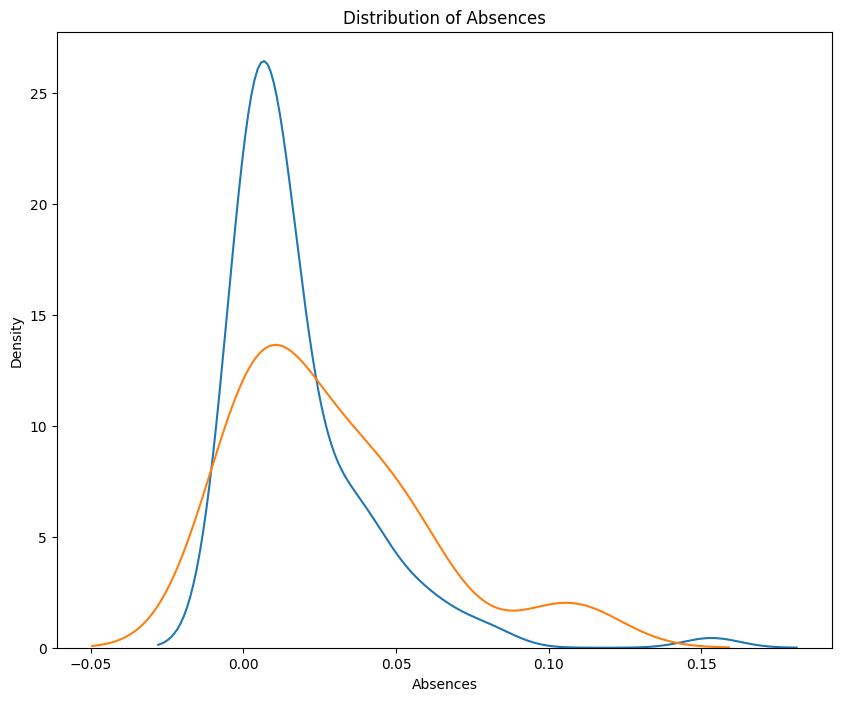

In [23]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['age'] == 17, 'absences'] / 365, label = 'age == 16')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['age'] == 19, 'absences'] / 365, label = 'age == 19')

# Labeling of plot
plt.xlabel('Absences'); plt.ylabel('Density'); plt.title('Distribution of Absences');
#распределение пропусков занятий при возрасте пьющих 17 и 19 лет, получается что с возрастом люди пьют по идее меньше, если посещают занятия больше

In [24]:
# Extract the negative correlation variables and show correlations
ext_data = app_train[['age', 'G2', 'G3', 'Fedu', 'failures']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,age,G2,G3,Fedu,failures
age,1.000000,-0.143474,-0.161579,-0.163438,0.243665
G2,-0.143474,1.000000,0.904868,0.164893,-0.355896
G3,-0.161579,0.904868,1.000000,0.152457,-0.360415
Fedu,-0.163438,0.164893,0.152457,1.000000,-0.250408
failures,0.243665,-0.355896,-0.360415,-0.250408,1.000000


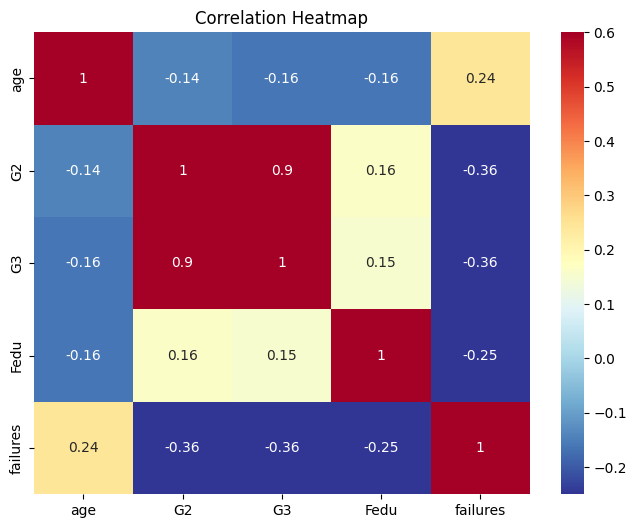

In [25]:
plt.figure(figsize = (8, 6))
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

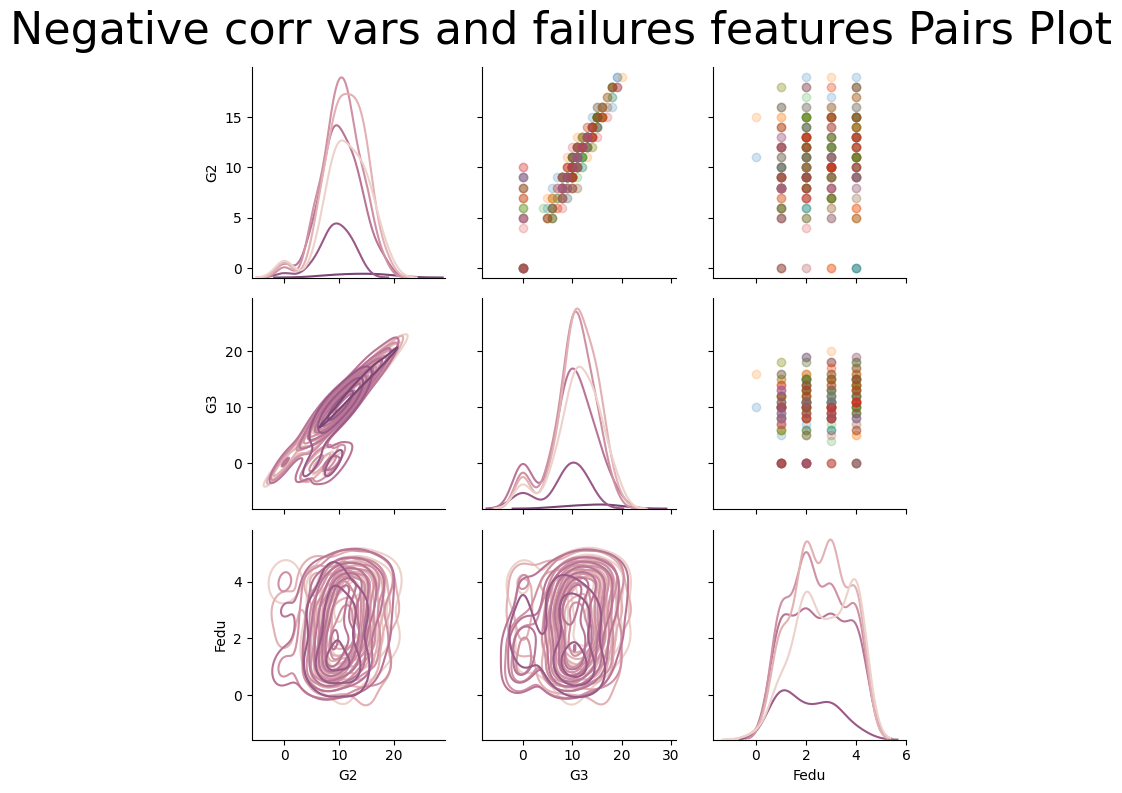

In [26]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['failures']).copy()

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, diag_sharey=False,
                    hue = 'age', 
                    vars = [x for x in list(plot_data.columns) if x != 'age'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Negative corr vars and failures features Pairs Plot', size = 32, y = 1.05);

In [27]:
from sklearn.linear_model import LogisticRegression

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import MinMaxScaler

if 'age' in app_train:
    train = app_train.drop(columns = ['age'])
else:
    train = app_train.copy()
    
features = list(train.columns)
test = app_test.copy()
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
scaler = MinMaxScaler(feature_range = (0, 1))
imputer.fit(train)
train = imputer.transform(train)
scaler.fit(train)
train = scaler.transform(train)
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (395, 15)
Testing data shape:  (395, 15)


In [28]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [29]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import shap
from sklearn.metrics import accuracy_score
import numpy as np

In [30]:
random_forest.fit(train, train_labels)
feature_importance_values = random_forest.feature_importances_
print(len(features))
print(len(feature_importance_values))
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


15
15


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = 0.0001)
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

In [32]:
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [33]:
submit = app_test[['Medu']]
submit['age'] = log_reg_pred

submit.head()

,Medu,age
0,4,0.263889
1,1,0.263540
2,1,0.263874
3,4,0.265224
4,3,0.264549


In [34]:
def plot_feature_importances(df):
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

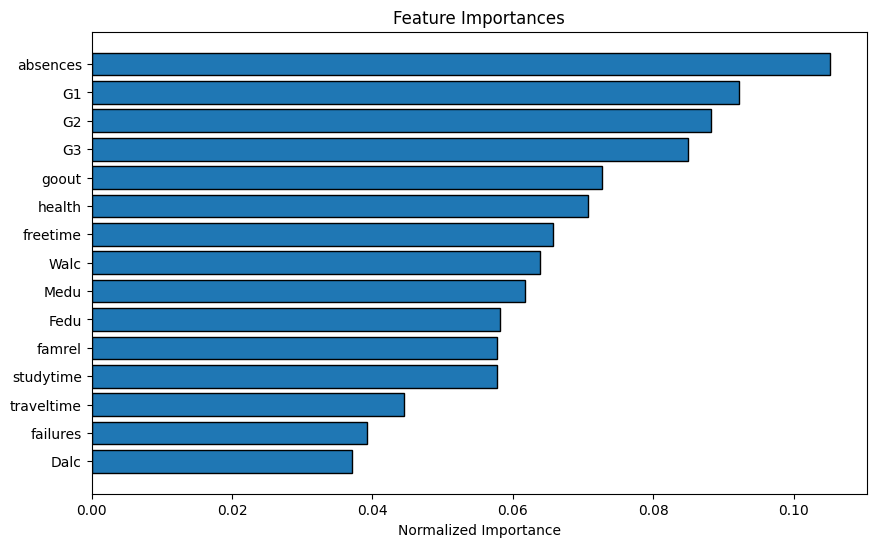

In [35]:
feature_importances_sorted = plot_feature_importances(feature_importances)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [37]:
import pandas as pd
columns = ['Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']
dataset =  pd.read_csv('C:/Users/Eduard/.vscode/extensions/ms-toolsai.jupyter-2021.6.832593372/pythonFiles/student-mat-test2.csv')
data = pd.DataFrame(dataset['data'], columns=columns)
data['age'] = dataset['target']
display(data.head())
display(data.info())
display(data.isna().sum())
display(data.describe())

KeyError: 'data'

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('cancer', axis=1)  
y = data['cancer'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state = 2020, stratify=y)

KeyError: "['cancer'] not found in axis"